In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import seaborn as sns
import csv

In [2]:
games = pd.read_excel('../Results.xlsx', sheet_name='Games')
turns = pd.read_excel('../Results.xlsx', sheet_name='Turns')
pvp_games = games.query('GameState == "END" and idPerson1 not in [10, 30, 203, 217]'
                        ' and idPerson2 not in [10, 30, 203, 217]')
pvp_games_ids = pvp_games['idGame']

In [3]:
pvp_games_turns = []
pvp_games_states = []
for i in pvp_games_ids:
    pvp_game_i_turns = turns.query('Games_idGame == ' + str(i))
    if (max(pvp_game_i_turns['idTurn']) >= 400):
        for state in pvp_game_i_turns['State']:
            pvp_games_states.append(state)
        pvp_games_turns.append(max(pvp_game_i_turns['idTurn']))
print(np.mean(pvp_games_turns))

597.6153846153846


In [4]:
from get_prob_matrix import get_prob_matrix
from get_prob_matrix_symmetry import get_prob_matrix_symmetry
from get_fundamental_matrix import get_fundamental_matrix
from get_mean_time import get_mean_time

In [5]:
N = 16

qr, probability_matrix = get_prob_matrix(N, pvp_games_states)
qr_symm, probability_matrix_symm = get_prob_matrix_symmetry(N, pvp_games_states)
fundamental_matrix = get_fundamental_matrix(probability_matrix)
fundamental_matrix_symm = get_fundamental_matrix(probability_matrix_symm)
mean_time = get_mean_time(N - 1, fundamental_matrix)
mean_time_symm = get_mean_time(N - 1, fundamental_matrix_symm)
print("mean time: ", mean_time)
print("mean time symm: ", mean_time_symm)

even = 0
odd = 0
for i in pvp_games_turns:
    if i % 2 == 0:
        even +=1
    else:
        odd +=1 
print(even / len(pvp_games_turns))
print(odd / len(pvp_games_turns))

mean time:  601.8747088078858
mean time symm:  605.9282554073341
0.15384615384615385
0.8461538461538461


In [6]:
with open("q.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(probability_matrix)
with open("q_symm.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(probability_matrix_symm)

with open("qr.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(qr)
with open("qr_symm.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(qr_symm)    
    
with open("fundamental.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(fundamental_matrix)
with open("fundamental_symm.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(fundamental_matrix_symm)

In [9]:
# heatmap
from digitalize_states import digitalize_states
from convert_games2states import convert_games2states
from get_game_trajectories import get_game_trajectories
from get_all_games import get_all_games

states = digitalize_states(pvp_games_states)

pvp_states = np.empty((17,17))
for i in range(0, 17):
    for j in range (0, 17):
        pvp_states[i, j] = states.count((i, j)) / len(states)


pvp_states_symm = convert_games2states(get_all_games(N, get_game_trajectories(states)))
pvp_symm = np.empty((17, 17))
for i in np.arange(0, 17):
    for j in np.arange (0, 17):
        pvp_symm[i, j] = pvp_states_symm.count((i, j)) / len(pvp_states_symm)

In [10]:
print(pvp_states[8, 8])
print(pvp_symm[8,8])

0.03790799280390645
0.03790799280390645


In [11]:
#fig, axes = plt.subplots(2, figsize=(8.27, 5.5))
#plt.rcParams['figure.dpi'] = 300

#sns.heatmap(pvp_states, cmap='jet', linecolor='purple', 
#            linewidth=0.05, ax=axes[0], square=True, xticklabels=False, yticklabels=False)
#axes[0].set_title("PvP heatmap")
#sns.heatmap(pvp_symm, cmap='jet', linecolor='purple', 
#            linewidth=0.05, ax=axes[1], square=True,  xticklabels=False, yticklabels=False)
#axes[1].set_title("PvP symmetry heatmap")
#plt.show()

In [12]:
from generate_distribution import generate_distribution

In [13]:
gen_turns = generate_distribution(N, qr)
gen_turns_symm = generate_distribution(N, qr_symm)

100%|███████████████████████████████████████████████████████████████████████| 1000000/1000000 [35:06<00:00, 474.63it/s]


In [14]:
print(np.mean(gen_turns))
print(np.mean(gen_turns_symm))
even = 0
odd = 0
even_symm = 0
odd_symm = 0
for i in gen_turns:
    if i % 2 == 0:
        even += 1
    else:
        odd += 1
        
for i in gen_turns_symm:
    if i % 2 == 0:
        even_symm += 1
    else:
        odd_symm += 1

        
print(even / len(gen_turns))
print(odd / len(gen_turns))
print(even_symm / len(gen_turns_symm))
print(odd_symm / len(gen_turns_symm))

601.079761
606.196818
0.151515
0.848485
0.153904
0.846096


In [15]:
xtick = 50
bin_width = 16
start_point = 40
end_point = 400
bins_ranges = []
gen_turns_count = []

for i in np.arange(8, max(gen_turns)+bin_width, bin_width):
    bins_ranges.append(i)

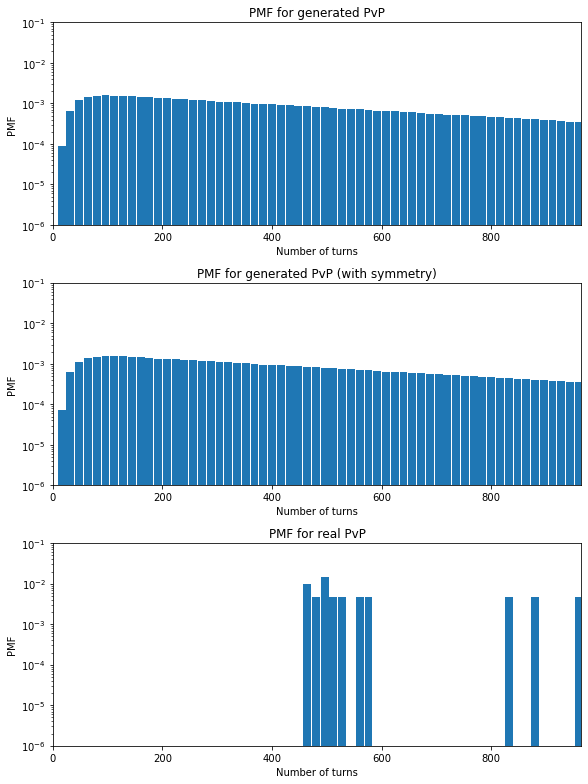

In [16]:
fig, axes = plt.subplots(3, figsize=(8.27, 11))
plt.rcParams['figure.dpi'] = 300
max_x = max(pvp_games_turns)

axes[0].set_yscale("log")
axes[0].set_xlabel("Number of turns")
axes[0].set_ylabel("PMF")
axes[0].set_title("PMF for generated PvP")
axes[0].set_ylim(ymin = 0.000001, ymax = 0.1)
axes[0].set_xlim(xmin = 0, xmax = max_x)
n_pvp_gen, bins_pvp_gen, patches_pvp_gen = axes[0].hist(gen_turns, 
                                                        bins=bins_ranges, 
                                                        rwidth=0.9, density=True) 
axes[1].set_yscale("log")
axes[1].set_xlabel("Number of turns")
axes[1].set_ylabel("PMF")
axes[1].set_title("PMF for generated PvP (with symmetry)")
axes[1].set_ylim(ymin = 0.000001, ymax = 0.1)
axes[1].set_xlim(xmin = 0, xmax = max_x)
n_pvp_gen_symm, bins_pvp_gen_symm, patches_pvp_gen_symm = axes[1].hist(gen_turns_symm, 
                                                                       bins=bins_ranges, 
                                                                       rwidth=0.9, density=True) 
axes[2].set_yscale("log")
axes[2].set_xlabel("Number of turns")
axes[2].set_ylabel("PMF")
axes[2].set_title("PMF for real PvP")
axes[2].set_ylim(ymin = 0.000001, ymax = 0.1)
axes[2].set_xlim(xmin = 0, xmax = max_x)
n_pvp, bins_pvp, patches_pvp = axes[2].hist(pvp_games_turns, 
                                            bins=bins_ranges, 
                                            rwidth=0.9, density=True)
fig.tight_layout()
plt.show()

In [17]:
xs_sampling = []
ys_sampling = []
for i in range (0, len(bins_pvp_gen) - 1):
    xs_sampling.append(bins_pvp_gen[i] + (bins_pvp_gen[i + 1] - bins_pvp_gen[i]) / 2)
ys_sampling = n_pvp_gen

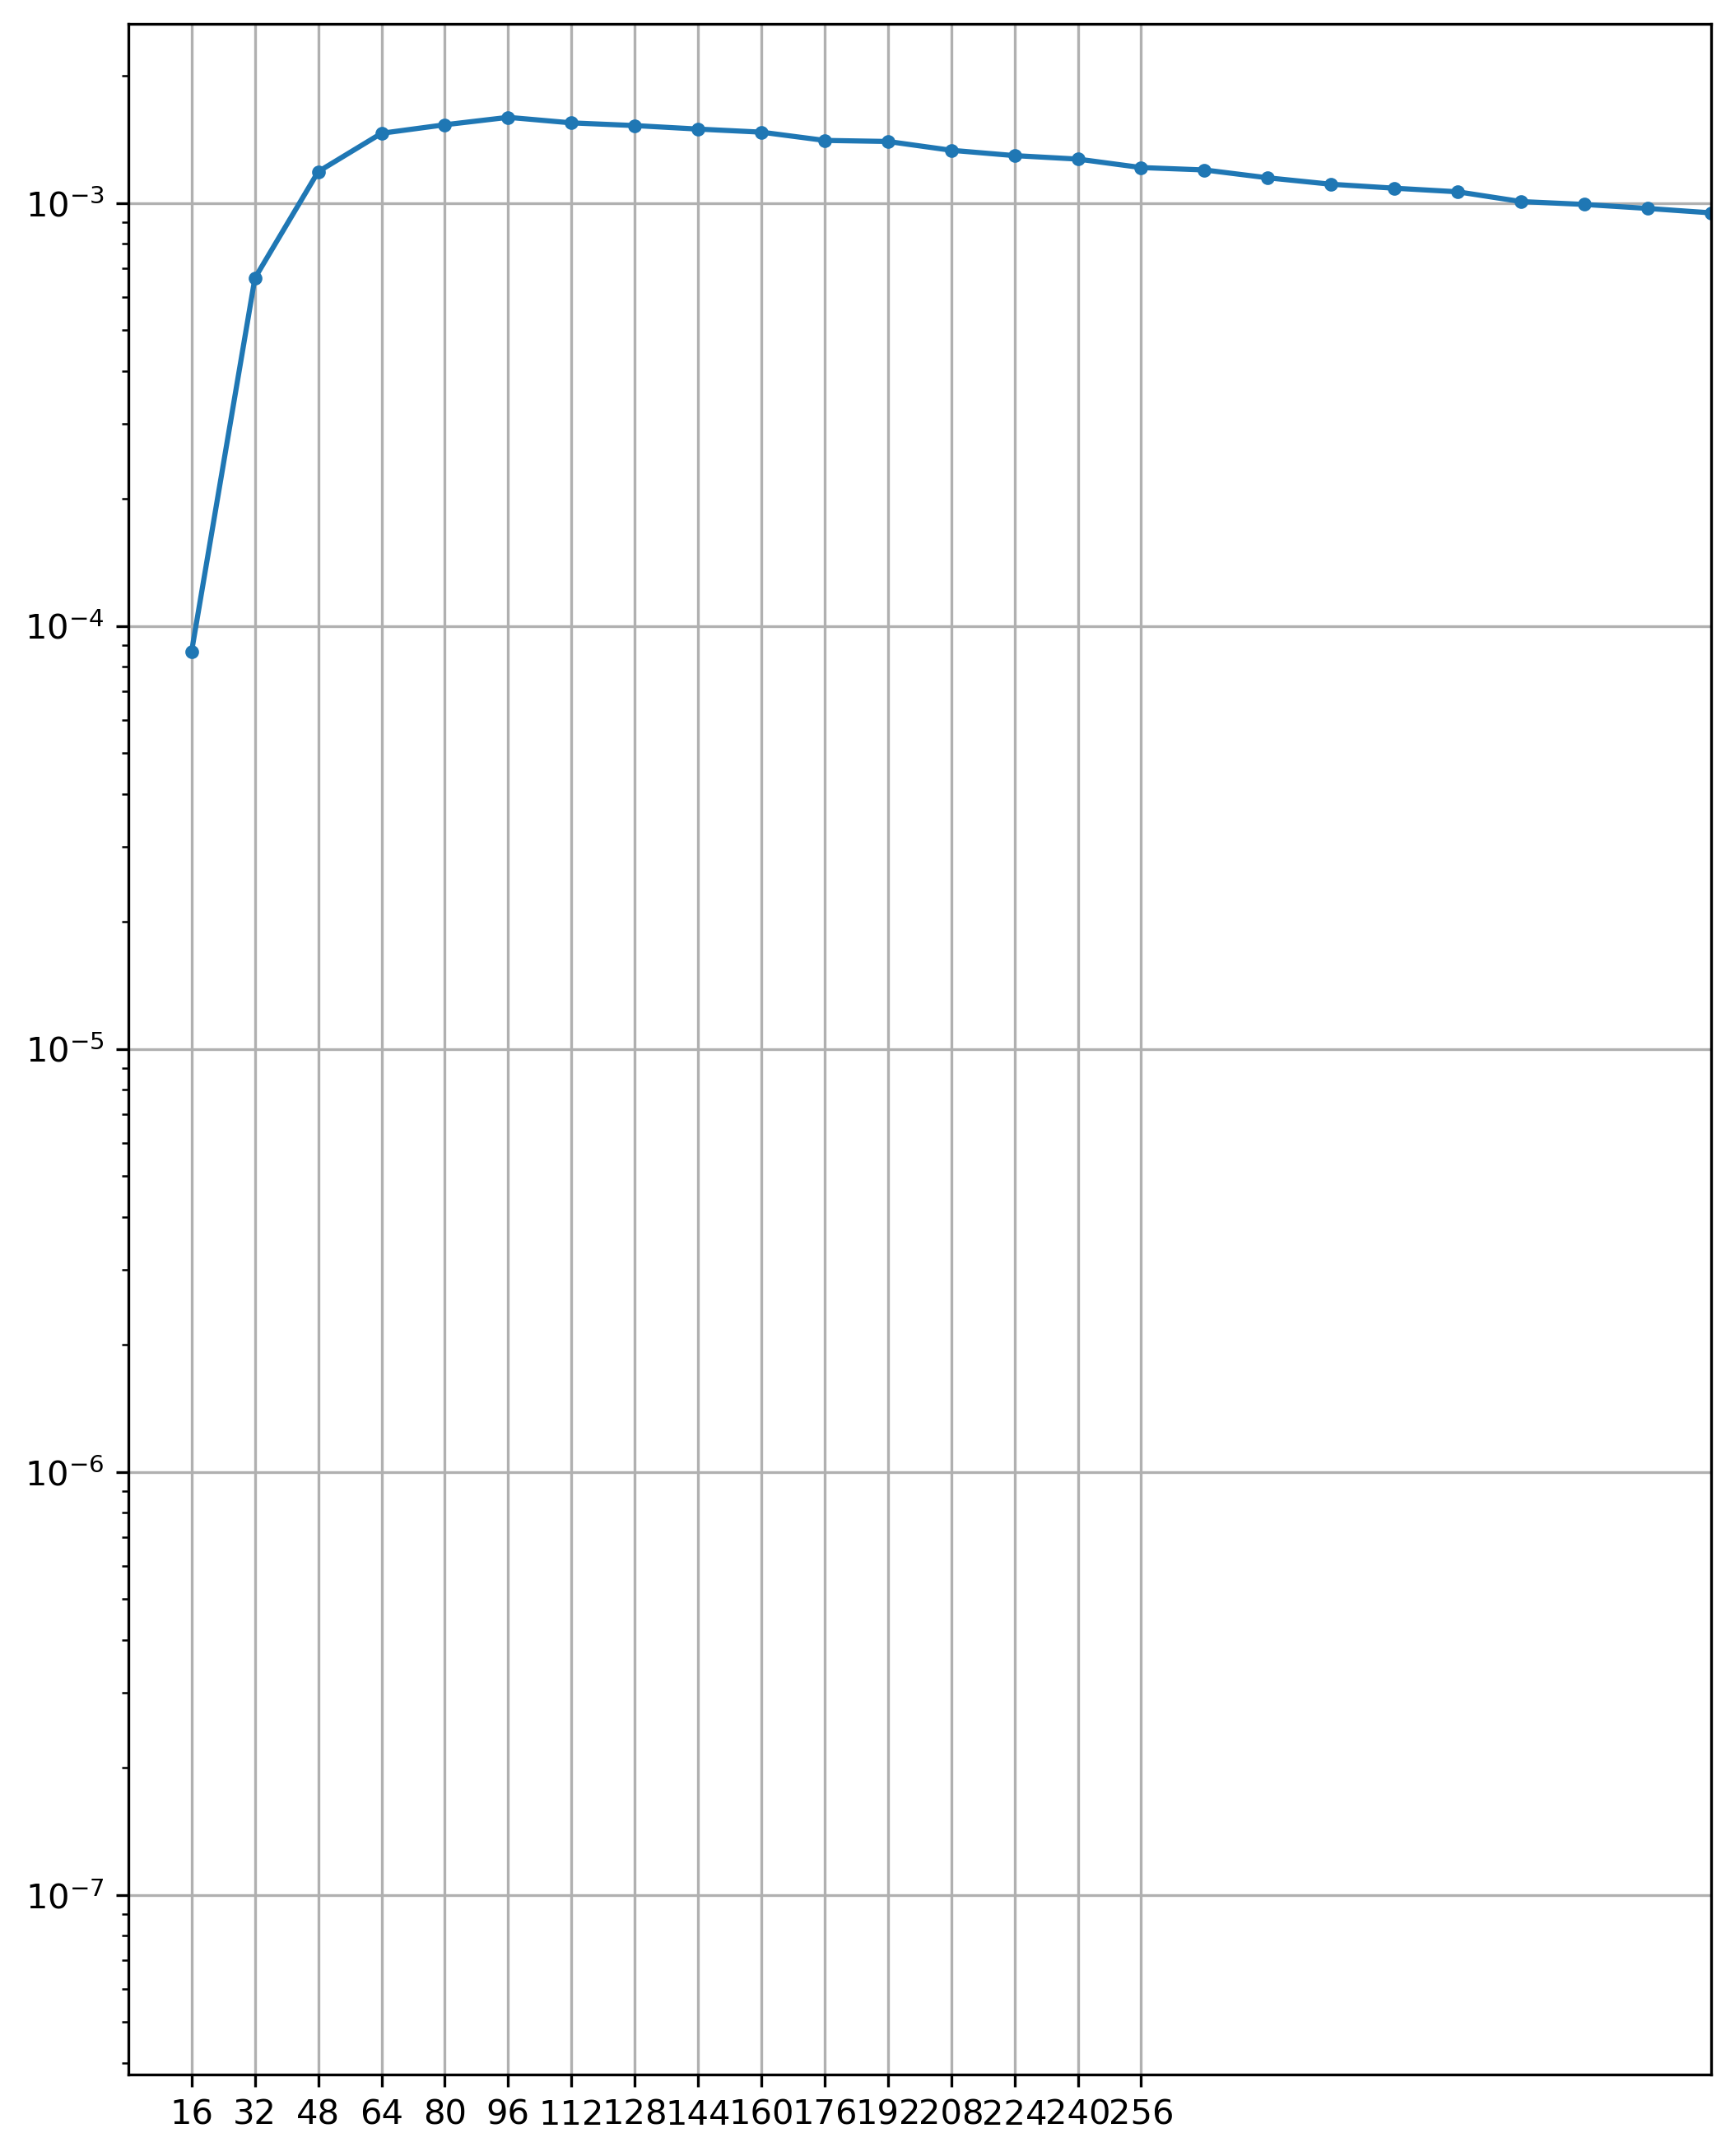

In [18]:
plt.rcParams['figure.figsize']=(8.27, 11)
plt.rcParams['figure.dpi'] = 300
plt.xlim(0, 400)
plt.xticks(xs_sampling[0:16])
plt.grid()
plt.plot(xs_sampling, ys_sampling,'.-')
plt.yscale("log")
plt.show()

In [19]:
from model_pvp import model_pvp

In [20]:
d, prob, (even, odd) = model_pvp(N, qr)
d_symm, prob_symm, (even_symm, odd_symm) = model_pvp(N, qr_symm)

In [21]:
print(sum(d))
print(sum(d_symm))

601.8745109279234
605.9280418704801


In [22]:
print(even)
print(odd)
print(even_symm)
print(odd_symm)

0.15181686712679943
0.8481831141342081
0.15383168466279298
0.8461682951199224


NameError: name 'xs' is not defined

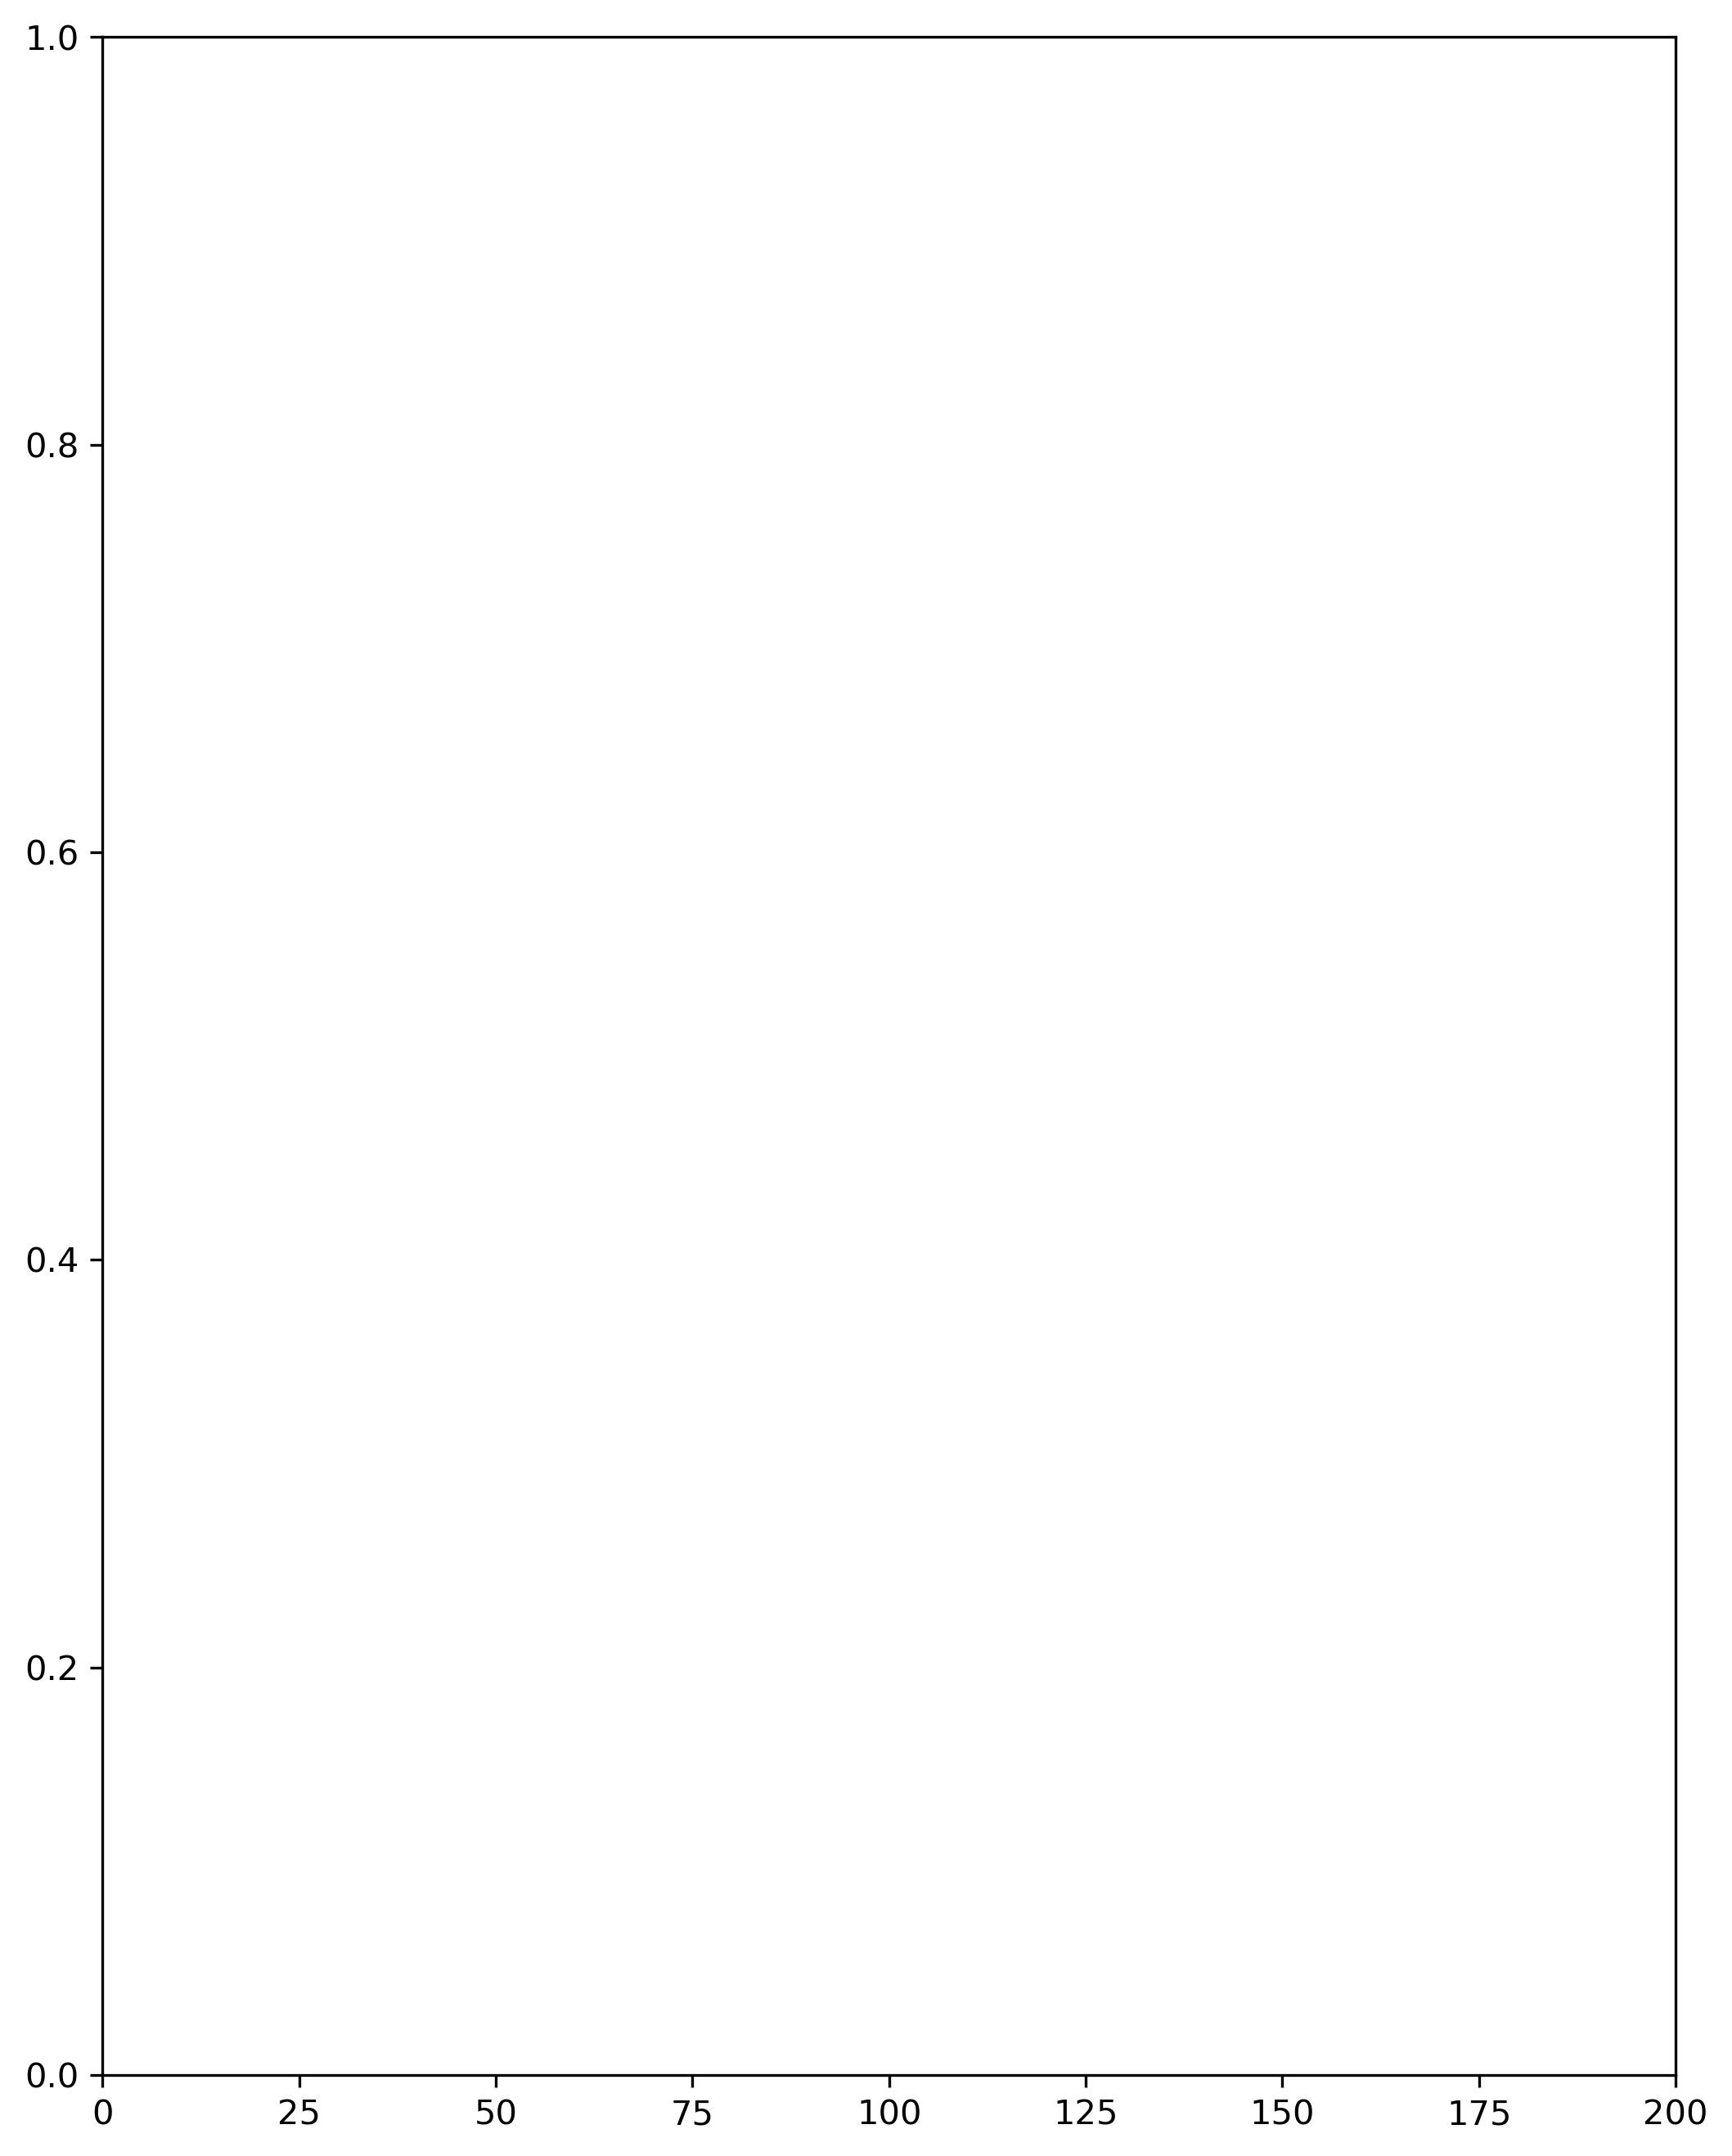

In [23]:
plt.rcParams['figure.figsize']=(8.27, 11)
plt.rcParams['figure.dpi'] = 300
plt.xlim(0, 200)
plt.xticks(xs[0:16])
plt.grid()

xs = []
ys = []
x0 = 8 + bin_width / 2
for i in range (0, len(prob) // bin_width):
    xs.append(x0 + bin_width * i)
for i in range (0, len(prob) // bin_width):
    ys.append(sum(prob[bin_width * i : bin_width * (i + 1)]) / bin_width)
plt.plot(xs, ys,'.-')
plt.yscale("log")
plt.show()

In [ ]:
xs_ys = [[],[]]
xs_ys[0].append("x")
xs_ys[1].append("y")
xs_ys[0].extend(xs)
xs_ys[1].extend(ys)
xs_ys = np.array(xs_ys)
xs_ys = np.transpose(xs_ys)

In [ ]:
with open("../csv/pvp_400_model.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(xs_ys)

In [ ]:
plt.plot(prob, '.')
plt.xlim([8, 200])
plt.ylim(ymin = 0.000001, ymax = 0.01)
plt.yscale("log")
plt.show()

In [ ]:
pvp_count = []
uniques = np.array(gen_turns)
uniques = np.unique(uniques)
for i in uniques:
    pvp_count.append(gen_turns.count(i) / len(gen_turns))
    
pvp_count_symm = []
uniques_symm = np.array(gen_turns_symm)
uniques_symm = np.unique(uniques)
for i in uniques:
    pvp_count_symm.append(gen_turns_symm.count(i) / len(gen_turns_symm))

In [ ]:
#plt.plot(uniques, pvp_count)
plt.yscale("log")
plt.xlabel("Number of turns")
plt.ylabel("PMF")
plt.title("PMF for real PvP")



plt.ylim(ymin = 0.000001, ymax = 0.1)
#plt.plot(uniques, pvp_count, 'g.', label="Sampling")
plt.plot(xs_sampling, ys_sampling, 'g-', label="Sampling")
plt.xlim([0, 2000])

n_pvp, bins_pvp, patches_pvp = plt.hist(pvp_games_turns, 
                                            bins=bins_ranges, 
                                            rwidth=0.9, density=True, label="hist")

#plt.plot(prob, 'r.', label="Modelling")
plt.plot(xs, ys, 'r-', label="Modelling")
plt.legend()
#pvp_count = np.array(pvp_count)
#pvp_count = pvp_count / sum(pvp_count)
plt.show()

In [ ]:
fig, axes = plt.subplots(3, figsize=(8.27, 11))
plt.rcParams['figure.dpi'] = 300
#max_x = max(pvp_games_turns)
max_x = 4500

axes[0].set_yscale("log")
axes[0].set_xlabel("Number of turns")
axes[0].set_ylabel("PMF")
axes[0].set_title("PMF for generated PvP 400+")
axes[0].set_ylim(ymin = 0.000001, ymax = 0.01)
axes[0].set_xlim(xmin = 0, xmax = max_x)
n_pvp_gen, bins_pvp_gen, patches_pvp_gen = axes[0].hist(gen_turns, 
                                                        bins=bins_ranges, 
                                                        rwidth=0.9, density=True, 
                                                        label="Sampling") 
#axes[0].plot(prob, 'r.', label="Modelling")
axes[0].plot(xs, ys, 'r-', label="Modelling")
axes[0].legend()
axes[1].set_yscale("log")
axes[1].set_xlabel("Number of turns")
axes[1].set_ylabel("PMF")
axes[1].set_title("PMF for generated PvP 400+(with symmetry)")
axes[1].set_ylim(ymin = 0.000001, ymax = 0.01)
axes[1].set_xlim(xmin = 0, xmax = max_x)
n_pvp_gen_symm, bins_pvp_gen_symm, patches_pvp_gen_symm = axes[1].hist(gen_turns_symm, 
                                                                       bins=bins_ranges, 
                                                                       rwidth=0.9, density=True, 
                                                                       label="Sampling symm") 
#axes[1].plot(prob, 'r.', label="Modelling")
axes[1].plot(xs, ys, 'r-', label="Modelling")
axes[1].legend()
axes[2].set_yscale("log")
axes[2].set_xlabel("Number of turns")
axes[2].set_ylabel("PMF")
axes[2].set_title("PMF for real PvP 400+")
axes[2].set_ylim(ymin = 0.000001, ymax = 0.01)
axes[2].set_xlim(xmin = 0, xmax = max_x)
n_pvp, bins_pvp, patches_pvp = axes[2].hist(pvp_games_turns, 
                                            bins=bins_ranges, 
                                            rwidth=0.9, density=True,
                                            label="Real pvp games")
#axes[2].plot(prob, 'r.', label="modelling")
axes[2].plot(xs, ys, 'r-', label="Modelling")
axes[2].legend()
fig.tight_layout()
plt.show()